In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import scipy
from scipy import stats
import statistics

In [4]:
df = pd.read_csv('/Users/wenboyi/Desktop/HR/RR/mdRQA Joint Script/testtable_new_0.61_6_8.csv')
df = df.rename(columns={'1': 'Size','2':'%REC','3':'%DET','4':'MeanL','5':'MaxL','6':'EntrL','7':'%LAM','8':'MeanV','9':'MaxV','10':'EntrV'})
df = df.drop(['Unnamed: 10'],axis=1)
label = ['Moving baseline','Blind','Score-directed','Normal','Violin-isolated','Noraml_R','Sight-reading','Concert','Bach','Quiet Baseline','Haydn_last']
group = ['Invalid','Visual','Invalid','Normal','Visual','Normal','Invalid','Normal','Invalid','Invalid','Invalid']
df['Label'] = label
df['Group'] = group
df = df.drop(df[df['Label']=='Bach'].index)
df = df.drop(df[df['Label']=='Haydn_last'].index)
df

,Size,%REC,%DET,MeanL,MaxL,EntrL,%LAM,MeanV,MaxV,EntrV,Label,Group
0,32,12.304688,96.825397,7.625000,31,2.250000,100.000000,4.937500,7,1.940928,Moving baseline,Invalid
1,260,5.500000,94.513179,10.458333,258,2.980373,97.536450,9.349398,26,3.992039,Blind,Visual
2,250,9.052800,96.076352,11.139344,248,3.432577,98.019634,11.989648,60,4.600485,Score-directed,Invalid
3,248,9.332726,96.202091,9.234114,247,3.094094,97.578490,11.087287,43,4.460128,Normal,Normal
4,244,4.763504,96.191819,12.867925,242,2.991878,98.311688,10.737589,21,3.717873,Violin-isolated,Visual
5,242,8.223482,97.508306,11.858586,240,3.614778,98.793990,12.523810,62,4.376599,Noraml_R,Normal
6,496,3.193288,93.253564,8.440092,494,3.053515,96.527778,7.555764,57,3.769625,Sight-reading,Invalid
7,232,8.613258,97.540984,12.491713,230,3.426816,98.870173,13.295580,37,4.724109,Concert,Normal
9,316,4.722801,87.913486,4.971223,315,2.398808,93.958665,5.710145,48,3.410070,Quiet Baseline,Invalid


9Quiet baseline 
- no body motion, eyes fixed on the center of the music score

0Moving baseline
- quartet played a slow scale while their eyes were fixed on the music score

1Blind 
- quartet played the Haydn excerpt while facing away from each other so that they couldn’t see each other at all

2Score-directed
- quartet played the Haydn excerpt while facing each other normally, but were only allowed to look at the score

3Normal-rehearsal
- quartet played the Haydn excerpt while facing each other normally & looking wherever they wanted

4Violin-isolated
- quartet played the Haydn excerpt while the 1st violinist was hidden behind a curtain; the others were allowed to look at each other normally

5Repetition-rehearsal
- same as Normal-rehearsal

6Sight-reading (prima vista)
- quartet played Langgaard’s String Quartet No. 5, 2nd movement, which they had never played or heard before

7Mini-concert (Haydn) (14:50), 17:08 = 2min 18s
- quartet played the full first movement of the Haydn for an audience of about 30 researchers; they were configured normally and allowed to look wherever they wanted

8Mini-concert (Bach)
- quartet played the Bach Contrapunctus for the same audience as above, again with normal visual conditions


['Quiet Baseline', 'Sight-reading', 'Blind', 'Score-directed', 'Violin-isolated', 'Normal', 'Moving baseline', 'Noraml_R', 'Concert'] [87.9134860050891, 93.2535641547861, 94.5131791285637, 96.0763520678685, 96.1918194640339, 96.2020905923345, 96.8253968253968, 97.5083056478405, 97.5409836065574]


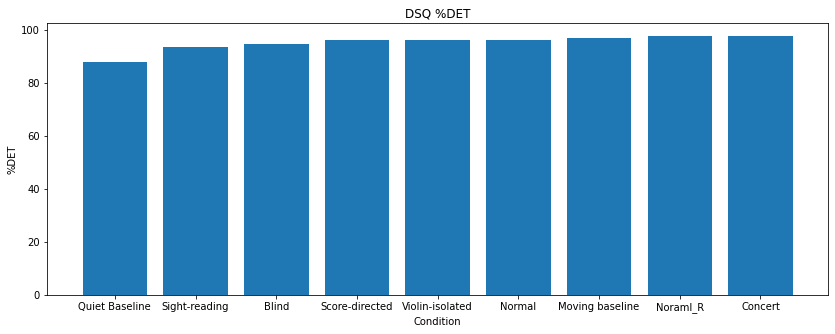

In [6]:
df = df.sort_values(by="%DET" , ascending=True) 
print(list(df['Label']),list(df['%DET']))
plt.figure(figsize=(14, 5))
plt.title("DSQ %DET")
plt.xlabel('Condition')
plt.ylabel('%DET')
plt.bar(df['Label'],df['%DET'])
plt.savefig('D DET.png')
plt.show()


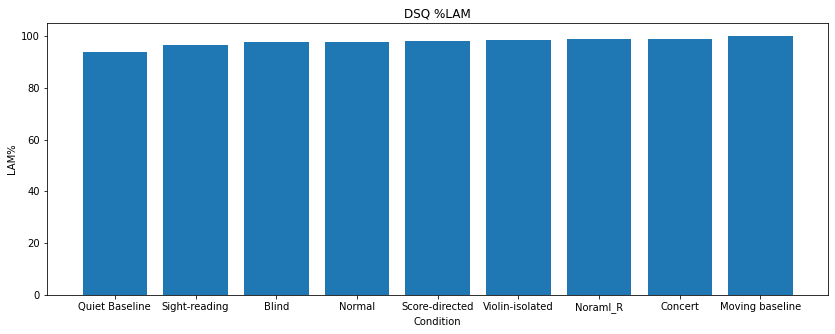

In [8]:
df = df.sort_values(by="%LAM" , ascending=True) 
plt.figure(figsize=(14, 5))
plt.title("DSQ %LAM")
plt.xlabel('Condition')
plt.ylabel('LAM%')
plt.bar(df['Label'],df['%LAM'])
plt.savefig('D LAM.png')
plt.show()


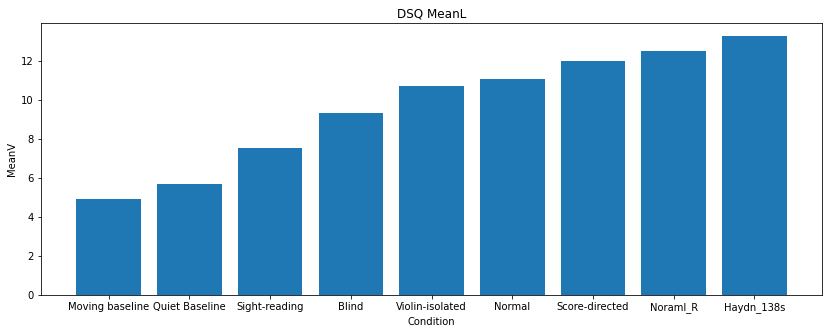

In [5]:
df = df.sort_values(by="MeanV" , ascending=True) 
plt.figure(figsize=(14, 5))
plt.title("DSQ MeanL")
plt.xlabel('Condition')
plt.ylabel('MeanV')
plt.bar(df['Label'],df['MeanV'])
plt.show()

In [10]:
a = df[df['Group']=='Visual']
a = list(a['%DET'])
b = df[df['Group']=='Normal']
print(list(b['%DET']))
b = statistics.mean(list(b['%DET']))
stats.ttest_1samp(a, b)

[96.2020905923345, 97.5083056478405, 97.5409836065574]


Ttest_1sampResult(statistic=-2.0627336891203534, pvalue=0.28737565068979576)

In [9]:
a = df[df['Group']=='Visual']
a = list(a['%DET'])
b = df[df['Group']=='Normal']
b = list(b['%DET'])
print(a)
print(b)

stats.ttest_ind(a, b)

[94.5131791285637, 96.1918194640339]
[96.2020905923345, 97.5083056478405, 97.5409836065574]


Ttest_indResult(statistic=-2.0468549748182525, pvalue=0.13316585361023517)